# PA005: High Value Customer Identification (Insiders)

# Planning the solution

## Input

1. Business problem:  
    * Select valuable clients to make up a loyalty program.  

2. Data  
    * E-commerce sales over a year period.

## Output

1. Identify customers that will be part of a loyalty program: Insiders.  
    - List: client_id | is_insider |  
    
            10323 | yes/l  
            23413 | no/l  

2. Relatório com as respostas das perguntas de negócio.  

        1. Who are the eligible customers to be part of the program Insiders?  
        2. How many clients will be part of the group?  
        3. What are the main characteristics of these clients?  
        4. What is the percentage contribution for the revenue coming from the Insiders?  
        5. What is the revenue expectation for this group for the upcoing months?  
        6. What are the elegibility conditions for a person to be part of the Insiders?  
        7. What are the conditions for a person to be excluded from the Insiders?  
        8. What guarantees the Insiders are better than the rest of the base?  
        9. What actions the marketing team should make to increase revenue?

## Tasks

1. Who are the eligible customers to be part of the program Insiders?  
    - What are eligible clients? What are high-valued clients?  
    - Revenue:  
        - High average ticket:  
        - High LTV  
        - Low recency  
        - High basket size  
        - Low CHURN probability  
        - High LTV forecast
        - High purchase propensity


    - Cost:  
        - Low return ratio  

    - Purchase experience:  
        - High mean evaluation  
        

2. How many clients will be part of the group?  
    - Total number of clients  
    - % from the Insiders group  


3. What are the main characteristics of these clients?  
    - What are the characteristics of the clients?  
        - Age  
        - Location

    - What are the purchasing characteristics  
        - Clustering atributes  

4. What is the percentage contribution for the revenue coming from the Insiders?  
    - Yearly revenue  
    - Insiders revenue  

5. What is the revenue expectation for this group for the upcoing months?  
    - LTV from Insiders group  
    - Cohort analysis  

6. What are the elegibility conditions for a person to be part of the Insiders?  
    - Determine the periodicity  to update the model ( 1 month, 3 months)  
    - A person must be similar to those people of the group  
    

7. What are the conditions for a person to be excluded from the Insiders?  
    - Determine the periodicity ( 1 month, 3 months)  
    - The person must be dissimilar to a person of the group  

8. What guarantees the Insiders are better than the rest of the base?  
    - A/B test  
    - Bayesian A/B test  
    - Hypothesis test  

9. What actions the marketing team should make to increase revenue?  
    - Discount  
    - Purchasing preference  
    - Front  
    - Company visiting  



## Solution Benchmarks

### 1. Desk research  

* Involves research how other people are solving a similar problem.  


**RFM Model**  

1. Recency  
    a. Time since last purchase  
    b. Responsivity  

2. Frequency  
    a. Mean time between transactions  
    b. Engagement  


3. Monetary  
    a. Total spent, revenue  
    b. 'High-value purchases'  


**Recency score**  
1. Step 1:  
    a. Order clients by recency

2. Step 2:  
    a. Divide the client based on their score  
        i. Scores from 1 to 5  
        ii. 5 groups of 20%  

3. Step 3:  
    a. Order clients by frequency  

4. Step 4:  
    a. Rate the scores  

5. Step 5:  
    a. Order clients by monetary  

6. Step 6:  
    a. Rate the scores 

7. Step 7:  
    a. Calculate teh average scores for recency, frequency, and monetary    

8. Step 8:  
    a. Rate the scores 



![](../images/rfm_model.png)

**RFM Model analysis**

1. Champions  
    a. Recent purchases, often high-valued products;  
    b. Offer awards to these customers.  

2. Potential loyalists  
    a. Recent purchases, good buying frequency and value spent;  
    b. Loyalty and upsell programs.

3. New customers
    a. Recent purchase, low frequency;  
    Relationship building, special offers.  

4. At Risk customers  
    a. "Long time since last purchase";  
    b. Reactivation, offers, and products campaigns.

5. Can't lose them.  

Insights from RFM model  
1. Who are your best customers?  
2. Which customers are close to churn?  
3. Which are potential clients to get into the loyalty program?  
4. Which customers need to be retained?
5. Which clients most likely will respond to marketing campaigns?

# 0.0 IMPORTS

In [67]:
import numpy    as np
import pandas   as pd
import seaborn  as sns

from matplotlib     import pyplot   as plt
from IPython.display import HTML

from ydata_profiling import ProfileReport

from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor


from plotly import express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import umap.umap_ as umap
import re

## 0.1. Auxiliary functions

In [3]:
def nb_settings():
    %matplotlib inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.container{width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    sns.set()

nb_settings()

## 0.2. Load data

In [4]:
df_raw = pd.read_csv('../../data/Ecommerce.csv', encoding='unicode_escape') #this dataset presented an encoding issue so that the encoding part in the code.
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis = 1)
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [5]:
print(f'Number of rows: {df1.shape[0]}\nNumber of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


## 1.2. Rename Columns

In [6]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new = [
    "invoice_no",
    "stock_code",
    "description",
    "quantity",
    "invoice_date",
    "unit_price",
    "customer_id",
    "country",
]
df1.columns = cols_new

## 1.3. Check NA's

In [7]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.4. Replace NA's

In [8]:
# First - separate the missing data on the 'customer_id'
df_missing = df1.loc[df1['customer_id'].isna(), :]


In [9]:
# Create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

# Merge original with reference
df1 = pd.merge(df1, df_backup, how='left', on='invoice_no')

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# Drop extr columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'], axis = 1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [10]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.5. Data Types

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   country       541909 non-null  object 
 7   customer_id   541909 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1.6. Change dtypes

In [12]:
# Invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#Customer ID
df1.loc[:,'customer_id'] = df1['customer_id'].astype(int)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   country       541909 non-null  object        
 7   customer_id   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 1.7. Descriptive Statistics

In [17]:
num_att = df1.select_dtypes(include=['int64','float64'])
cat_att = df1.select_dtypes(exclude=['int64','float64', 'datetime64[ns]'])

### 1.7.1. Numerical attributes

In [16]:
# Central tendency - mean and median
ct1 = pd.DataFrame(num_att.apply(np.mean)).T
ct2 = pd.DataFrame(num_att.apply(np.median)).T

# Dispersion - Standard deviation, minimum, maximum, range, skewness, kurtosis
d1 = pd.DataFrame(num_att.apply(np.std)).T
d2 = pd.DataFrame(num_att.apply(np.min)).T
d3 = pd.DataFrame(num_att.apply(np.max)).T
d4 = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_att.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T

# Concat data
m=pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['Attributes','Min','Max','Range','Mean','Median','SD','Skewness','Kurtosis']
m


,Attributes,Min,Max,Range,Mean,Median,SD,Skewness,Kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### 1.7.1.1. Investigate the numerical data

1. "quantity" has negative values. This may represent returns;  

2. "unit_price" have values equal to 0. This may be a promotion?

### 1.7.2. Categorical attributes

In [17]:
cat_att.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [14]:
# Invoice number
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]
print(f'Total number of invoices: {len(df_letter_invoices)}')
print(f'Total number of negative quantity: {len(df_letter_invoices[df_letter_invoices["quantity"] < 0])}')

Total number of invoices: 9291
Total number of negative quantity: 9288


In [15]:
# Stock code
df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-z]+$', x))), 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [18]:
# Stock code
df1.loc[cat_att['stock_code'].apply(lambda x: bool(re.search('^[a-zA-z]$', x))), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527.0
2239,536569,M,Manual,1,2016-11-29,1.25,United Kingdom,16274.0
2250,536569,M,Manual,1,2016-11-29,18.95,United Kingdom,16274.0
5684,536865,M,Manual,1,2016-12-01,2.55,United Kingdom,19025.0
6798,536981,M,Manual,2,2016-12-01,0.85,United Kingdom,14723.0


In [19]:
# Country
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [20]:
# Country
df1['country'].value_counts(normalize=True).head()

country
United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: proportion, dtype: float64

In [23]:
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# 2.0. FEATURE FILTERING

In [21]:
df2 = df1.copy()
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850.0


In [22]:
# Filter numerical attributes
# unit_price > 0
df2 = df2.loc[df2["unit_price"] > 0.04, :]

# Filter categorical attributes
# Stock code != [POST, D, M, DOT, CRUK, C2]
df2 = df2[
    ~df2["stock_code"].isin(
        [
            "POST",
            "D",
            "DOT",
            "M",
            "S",
            "AMAZONFEE",
            "m",
            "DCGSSBOY",
            "DCGSSGIRL",
            "PADS",
            "B",
            "CRUK",
            "C2"
        ]
    )
]

# Description
df2 = df2.drop(columns='description', axis = 1)

# map
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

# quantity
df2_returns = df2.loc[df2["quantity"] < 0, :]
df2_purchases = df2.loc[df2["quantity"] > 0, :]

# 3.0. FEATURE ENGINEERING

**Ideas for new features**  

*Moving average* - 7d, 14d, 30d  
*Monthly purchases* before and after the 15th day  
*Average financial*

In [23]:
df3 = df2.copy()

In [16]:
print(df3.shape)
df3.head()

(535934, 7)


,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


## 3.1. Feature Creation

In [24]:
# 1 - Create a reference table:
df_ref = df3.drop(
    ["invoice_no", "stock_code", "quantity", "invoice_date", "unit_price", "country"],
    axis=1,
).drop_duplicates(ignore_index=True)
# df_ref = df_ref.drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


### 3.1.1. Gross revenue

In [25]:
# 2 - Create a gross revenue feature (quantity * price)

df2_purchases.loc[:, "gross_revenue"] = (
    df2_purchases.loc[:, "quantity"] * df2_purchases.loc[:, "unit_price"]
)

# 2.1. - Calculate the monetary
df_monetary = (
    df2_purchases.loc[:,["customer_id", "gross_revenue"]]
    .groupby("customer_id")
    .sum()
    .reset_index()
)

df_ref = pd.merge(df_ref, df_monetary, on="customer_id", how="left")
df_ref.isna().sum()

/tmp/ipykernel_197557/628459901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchases.loc[:, "gross_revenue"] = (


customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2. Recency (day of the last purchase)

In [26]:
# 3 - Create a recency feature - day of the last purchase
df_recency = (
    df2_purchases[["customer_id", "invoice_date"]]
    .groupby("customer_id")
    .max()
    .reset_index()
)
df_recency["recency_days"] = (
    df2_purchases["invoice_date"].max() - df_recency["invoice_date"]
).dt.days
df_recency = df_recency[["customer_id", "recency_days"]].copy()
df_ref = pd.merge(df_ref, df_recency, on="customer_id", how="left")
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3. Purchases Amount


In [27]:
# 4 - Count the amount of purchased products
df_qty_purc = (
    df2_purchases[["customer_id", "invoice_no"]]
    .drop_duplicates()
    .groupby("customer_id")
    .count()
    .reset_index()
    .rename(columns = {'invoice_no':'qty_invoices'})
)
df_ref = pd.merge(df_ref, df_qty_purc, on="customer_id", how="left")
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qty_invoices     91
dtype: int64

### 3.1.4. Quantity of purchased items

In [28]:
df_amount = (
    df2_purchases[["customer_id", "quantity"]]
    .groupby("customer_id")
    .sum()
    .reset_index()
    .rename(columns = {"quantity":"qty_items"})
)
df_ref = pd.merge(df_ref, df_amount, on="customer_id", how="left")
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qty_invoices     91
qty_items        91
dtype: int64

### 3.1.5. Quantity of purchased products

In [29]:
df_amount = (
    df2_purchases[["customer_id", "stock_code"]]
    .groupby("customer_id")
    .count()
    .reset_index()
    .rename(columns = {"stock_code":"qty_products"})
)
df_ref = pd.merge(df_ref, df_amount, on="customer_id", how="left")
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qty_invoices     91
qty_items        91
qty_products     91
dtype: int64

### 3.1.6. Average ticket

In [30]:
# 5 - Create a avg Ticket
df_avg_ticket = df2_purchases[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qty_invoices     91
qty_items        91
qty_products     91
avg_ticket       91
dtype: int64

### 3.1.7. Average Recency Days

In [31]:
# Average

df_aux = (
    df2[["customer_id", "invoice_date"]]
    .drop_duplicates()
    .sort_values(["customer_id", "invoice_date"], ascending=[True, True])
)
df_aux["next_customer_id"] = df_aux["customer_id"].shift()
df_aux["previous_date"] = df_aux["invoice_date"].shift()

df_aux["avg_recency_days"] = df_aux.apply(
    lambda x: (
        (x["invoice_date"] - x["previous_date"]).days
        if x["customer_id"] == x["next_customer_id"]
        else np.nan
    ),
    axis=1,
)
df_aux = df_aux.drop(['invoice_date','next_customer_id','previous_date'], axis=1).dropna()

# avg recency
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index().astype(int)

# Merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoices          91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
dtype: int64

In [ ]:
df2.loc[df2['customer_id'] == 17850, ['invoice_no', 'invoice_date']].drop_duplicates()

### 3.1.8. Frequency purchase

In [33]:
df2_max = df2[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').max()
df2_min = df2[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').min()
df2_purchase = df2[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').count()

In [34]:
df_aux = (
    df2_purchases[["customer_id", 'invoice_no', "invoice_date"]]
    .drop_duplicates()
    .groupby("customer_id")
    .agg(
        max_=("invoice_date", "max"),
        min_=("invoice_date", "min"),
        days_= ("invoice_date", lambda x: (x.max() - x.min()).days + 1),
        buy_= ("invoice_no", "count"),
    )
).reset_index()

# Frequency
df_aux['frequency'] = df_aux[['buy_','days_']].apply(lambda x: x['buy_']/x['days_'] if x['days_'] != 0 else 0, axis = 1)

df_ref = pd.merge(df_ref, df_aux[['customer_id','frequency']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoices          91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

In [35]:
df_aux.sort_values('frequency', ascending=False).head()

,customer_id,max_,min_,days_,buy_,frequency
4008,17850.0,2016-11-30,2016-11-29,2,34,17.0
2762,16120.0,2017-10-09,2017-10-09,1,4,4.0
3790,17545.0,2017-10-25,2017-10-25,1,3,3.0
2621,15920.0,2017-07-06,2017-07-06,1,3,3.0
2008,15098.0,2017-06-08,2017-06-08,1,3,3.0


### 3.1.9. Returns

In [36]:
# Create number of returns
df_returns = df2_returns[['customer_id','quantity']].drop_duplicates().groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qty_returns'})
df_returns['qty_returns'] = df_returns['qty_returns'] * -1
df_ref = pd.merge(df_ref, df_returns, how='left', on='customer_id')
df_ref.loc[df_ref['qty_returns'].isna(), 'qty_returns'] = 0
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qty_invoices          91
qty_items             91
qty_products          91
avg_ticket            91
avg_recency_days    2816
frequency             91
qty_returns            0
dtype: int64

### 3.1.10. Average Distinct Products per purchase

In [37]:
df_aux = (
    df2_purchases.loc[:, ["customer_id", "invoice_no", "stock_code"]]
    .groupby("customer_id")
    .agg(n_purchase_un=("invoice_no", "nunique"), n_products_un=("stock_code", "count"))
    .reset_index()
)

# Calculations
df_aux['avg_unique_basket_size'] = df_aux['n_products_un'] / df_aux['n_purchase_un']


df_ref = pd.merge(df_ref, df_aux[['customer_id','avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qty_invoices                91
qty_items                   91
qty_products                91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qty_returns                  0
avg_unique_basket_size      91
dtype: int64

### 3.1.11. Basket Size - Quantity of items in the basket (quantity)

In [38]:
df_aux = (
    df2_purchases.loc[:, ["customer_id", "invoice_no", "quantity"]]
    .groupby("customer_id")
    .agg(n_purchase=("invoice_no", "nunique"), n_products=("quantity", "sum"))
    .reset_index()
)

# Calculations
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# Merge
df_ref = pd.merge(df_ref, df_aux[['customer_id','avg_basket_size']], how='left', on='customer_id')

df_ref.isna().sum()


customer_id                  0
gross_revenue               91
recency_days                91
qty_invoices                91
qty_items                   91
qty_products                91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qty_returns                  0
avg_unique_basket_size      91
avg_basket_size             91
dtype: int64

In [39]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qty_invoices,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qty_returns,avg_unique_basket_size,avg_basket_size
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.0,17.000000,21.0,8.735294,50.970588
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.0,0.028302,6.0,19.000000,154.444444
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.0,0.040323,50.0,15.466667,335.200000
3,13748.0,948.25,95.0,5.0,439.0,28.0,33.866071,92.0,0.017921,0.0,5.600000,87.800000
4,15100.0,876.00,333.0,3.0,80.0,3.0,292.000000,8.0,0.073171,22.0,1.000000,26.666667


# 4.0. EXPLORATORY DATA ANALYSIS (EDA)

In [40]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qty_invoices              0
qty_items                 0
qty_products              0
avg_ticket                0
avg_recency_days          0
frequency                 0
qty_returns               0
avg_unique_basket_size    0
avg_basket_size           0
dtype: int64

## 4.1. Univariate Analysis

**Notes**  
1. For clustering problems, we should look for cohesive and separate clusters 
2. The metrics we should investigate:  
    - Min, Max, Range (dispersion)  
    - Mean, Median  
    - Standard Deviation, Variance  
    - Coeffient of Variation  
    - Distribution    

* Business model defines the response. E.g. e-Commerce sells a variety of products in a wide spectrum of prices. Therefore, it is difficult to find a 'separation' due to this characteristic, as opposed to a business model where the product prices are far from each other.

In [51]:
profile = ProfileReport(df4)
profile.to_file('output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


### 4.1.1. Gross Revenue

In [148]:
df4.sort_values('gross_revenue', ascending=False).head(10)

,customer_id,gross_revenue,recency_days,qty_invoices,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qty_returns,avg_unique_basket_size,avg_basket_size
1017,14646.0,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.0,0.206215,144.0,28.611111,2733.944444
492,18102.0,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.0,0.163043,0.0,7.183333,1068.733333
433,17450.0,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.0,0.136111,952.0,7.326087,1521.586957
3338,16446.0,168472.50,0.0,2.0,80997.0,3.0,56157.500000,205.0,0.014563,80995.0,1.500000,40498.500000
66,14911.0,136263.72,1.0,198.0,79879.0,5586.0,24.393792,2.0,0.648794,1608.0,28.212121,403.429293
1150,12415.0,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.0,0.076433,369.0,35.650000,3868.650000
190,14156.0,116725.63,9.0,54.0,57772.0,1386.0,84.217626,7.0,0.175824,658.0,25.666667,1069.851852
15,17511.0,91062.38,2.0,31.0,64549.0,963.0,94.561142,11.0,0.120968,125.0,31.064516,2082.225806
12,16029.0,72882.09,38.0,62.0,40207.0,241.0,302.415311,9.0,0.196429,4824.0,3.887097,648.500000
955,16684.0,66653.56,4.0,28.0,50255.0,277.0,240.626570,22.0,0.084507,864.0,9.892857,1794.821429


In [108]:
df3[df3['customer_id']==14646.0].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646.0
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646.0
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646.0
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646.0
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646.0


## 4.2. Bivariate Analysis

## 4.3. Investigating the feature space

In [45]:
df43 = df4.drop(columns = ['customer_id'], axis = 1).copy()

df43.head()

,gross_revenue,recency_days,qty_invoices,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qty_returns,avg_unique_basket_size,avg_basket_size
0,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.0,17.000000,21.0,8.735294,50.970588
1,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.0,0.028302,6.0,19.000000,154.444444
2,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.0,0.040323,50.0,15.466667,335.200000
3,948.25,95.0,5.0,439.0,28.0,33.866071,92.0,0.017921,0.0,5.600000,87.800000
4,876.00,333.0,3.0,80.0,3.0,292.000000,8.0,0.073171,22.0,1.000000,26.666667


In [48]:
# Scaling data
mm = pp.MinMaxScaler()

df43["gross_revenue"] = mm.fit_transform(df43[["gross_revenue"]])
df43["recency_days"] = mm.fit_transform(df43[["recency_days"]])
df43["qty_invoices"] = mm.fit_transform(df43[["qty_invoices"]])
df43["qty_items"] = mm.fit_transform(df43[["qty_items"]])
df43["qty_products"] = mm.fit_transform(df43[["qty_products"]])
df43["avg_ticket"] = mm.fit_transform(df43[["avg_ticket"]])
df43["avg_recency_days"] = mm.fit_transform(df43[["avg_recency_days"]])
df43["frequency"] = mm.fit_transform(df43[["frequency"]])
df43["qty_returns"] = mm.fit_transform(df43[["qty_returns"]])
df43["avg_unique_basket_size"] = mm.fit_transform(df43[["avg_unique_basket_size"]])
df43["avg_basket_size"] = mm.fit_transform(df43[["avg_basket_size"]])

In [49]:
df43.head()

,gross_revenue,recency_days,qty_invoices,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qty_returns,avg_unique_basket_size,avg_basket_size
0,0.019292,0.997319,0.160976,0.008799,0.037774,0.000285,0.093151,1.000000,0.000259,0.025896,0.001234
1,0.011559,0.150134,0.039024,0.007056,0.021695,0.000298,0.071233,0.001345,0.000074,0.060260,0.003789
2,0.024000,0.005362,0.068293,0.025538,0.029479,0.000476,0.060274,0.002052,0.000617,0.048431,0.008252
3,0.003375,0.254692,0.019512,0.002225,0.003446,0.000565,0.249315,0.000734,0.000000,0.015400,0.002143
4,0.003116,0.892761,0.009756,0.000401,0.000255,0.005162,0.019178,0.003985,0.000272,0.000000,0.000634


### 4.3.1. PCA

In [50]:
X = df43.copy()

In [53]:
pca = dd.PCA(n_components = X.shape[1])
principal_components = pca.fit_transform(X)

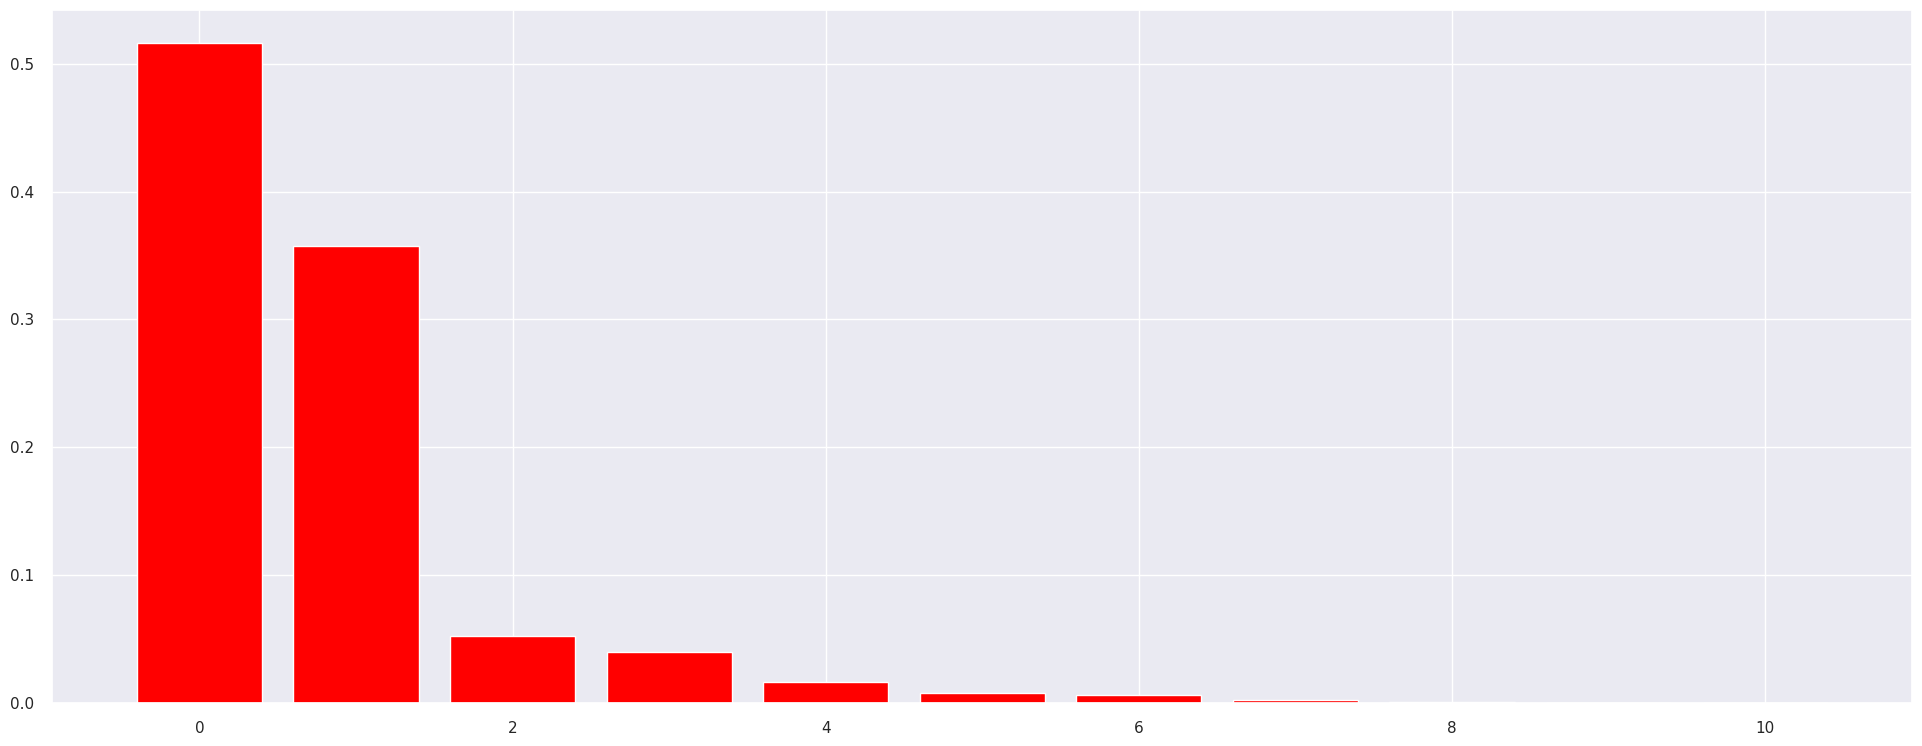

In [57]:
# Plot explained variance
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color = 'red');

In [58]:
# PCA components
df_pca = pd.DataFrame(principal_components)

df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.856083,-0.019785,0.036889,0.151223,0.099451,0.095372,0.959503,-0.008173,-0.003129,-0.005638,0.000850
1,-0.009721,-0.112587,-0.009218,0.004453,0.007660,0.003538,-0.006457,-0.002435,-0.002342,-0.000497,0.000138
2,-0.153448,-0.143225,-0.019197,0.033220,0.010460,0.003401,-0.000977,-0.008335,0.004982,0.001473,0.000037
3,0.076017,0.077684,-0.051803,0.013648,0.007461,0.001464,-0.006851,0.000036,-0.000931,-0.000697,0.000142
4,0.736043,-0.076914,-0.037199,0.027447,0.007325,0.003212,-0.029537,0.000533,-0.002645,-0.003276,0.003328


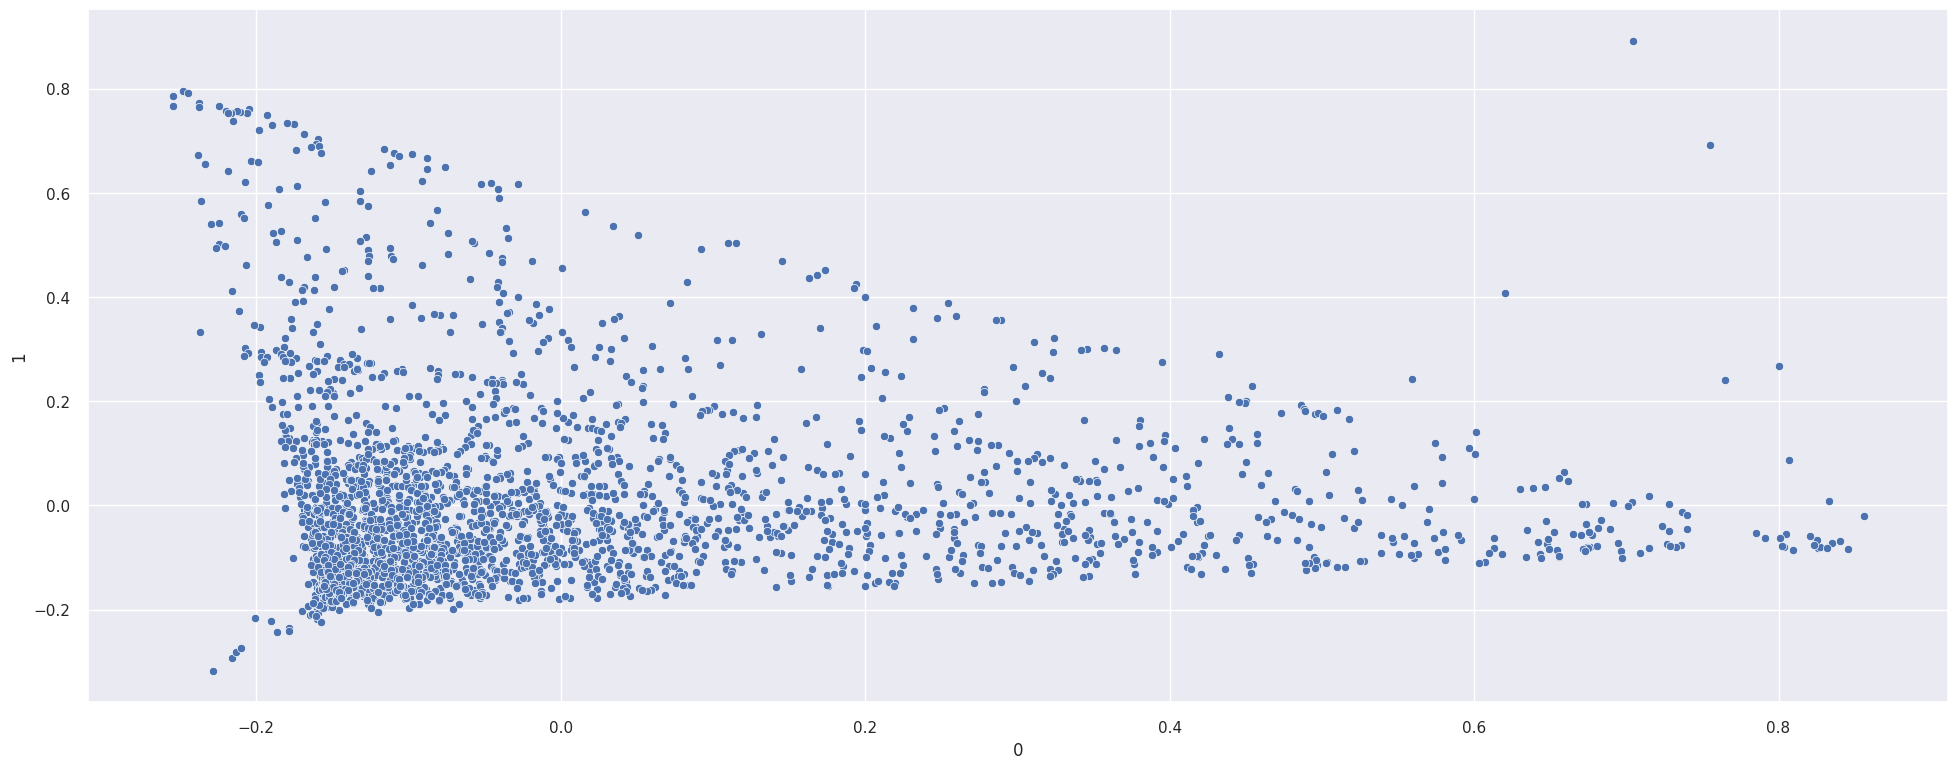

In [59]:
sns.scatterplot(x=0, y=1, data=df_pca);

### 4.3.2. UMAP

/home/thiago/.pyenv/versions/pa005/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


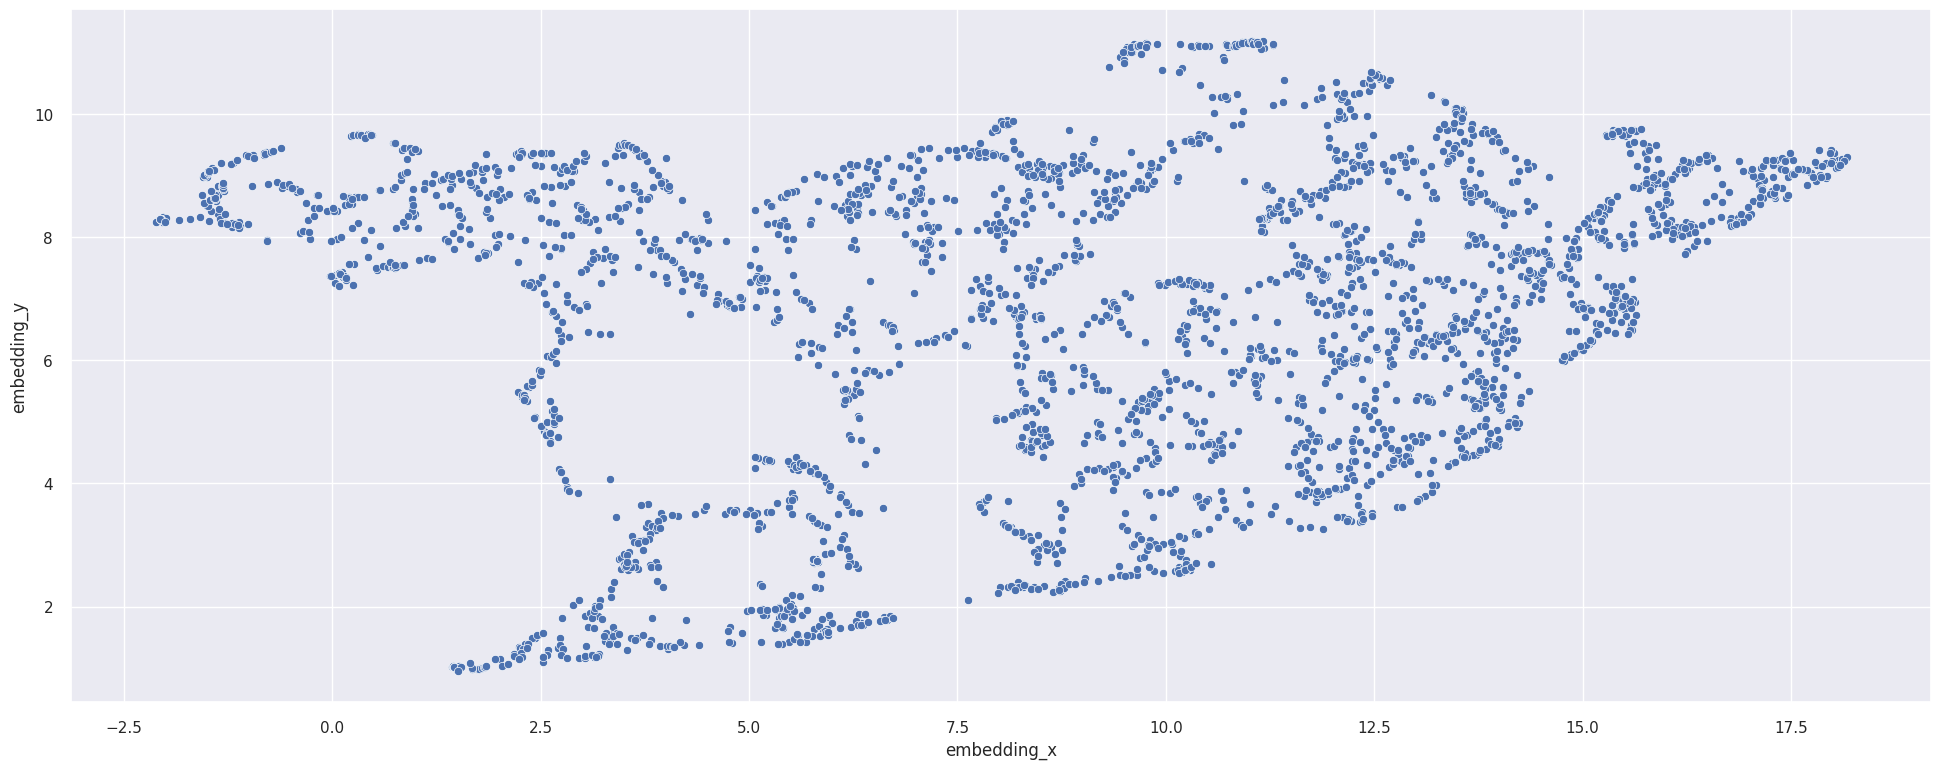

In [60]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# Embedding
df_pca["embedding_x"] = embedding[:, 0]
df_pca["embedding_y"] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(
    x="embedding_x",
    y="embedding_y",
    data=df_pca
);

### 4.3.3. t-SNE

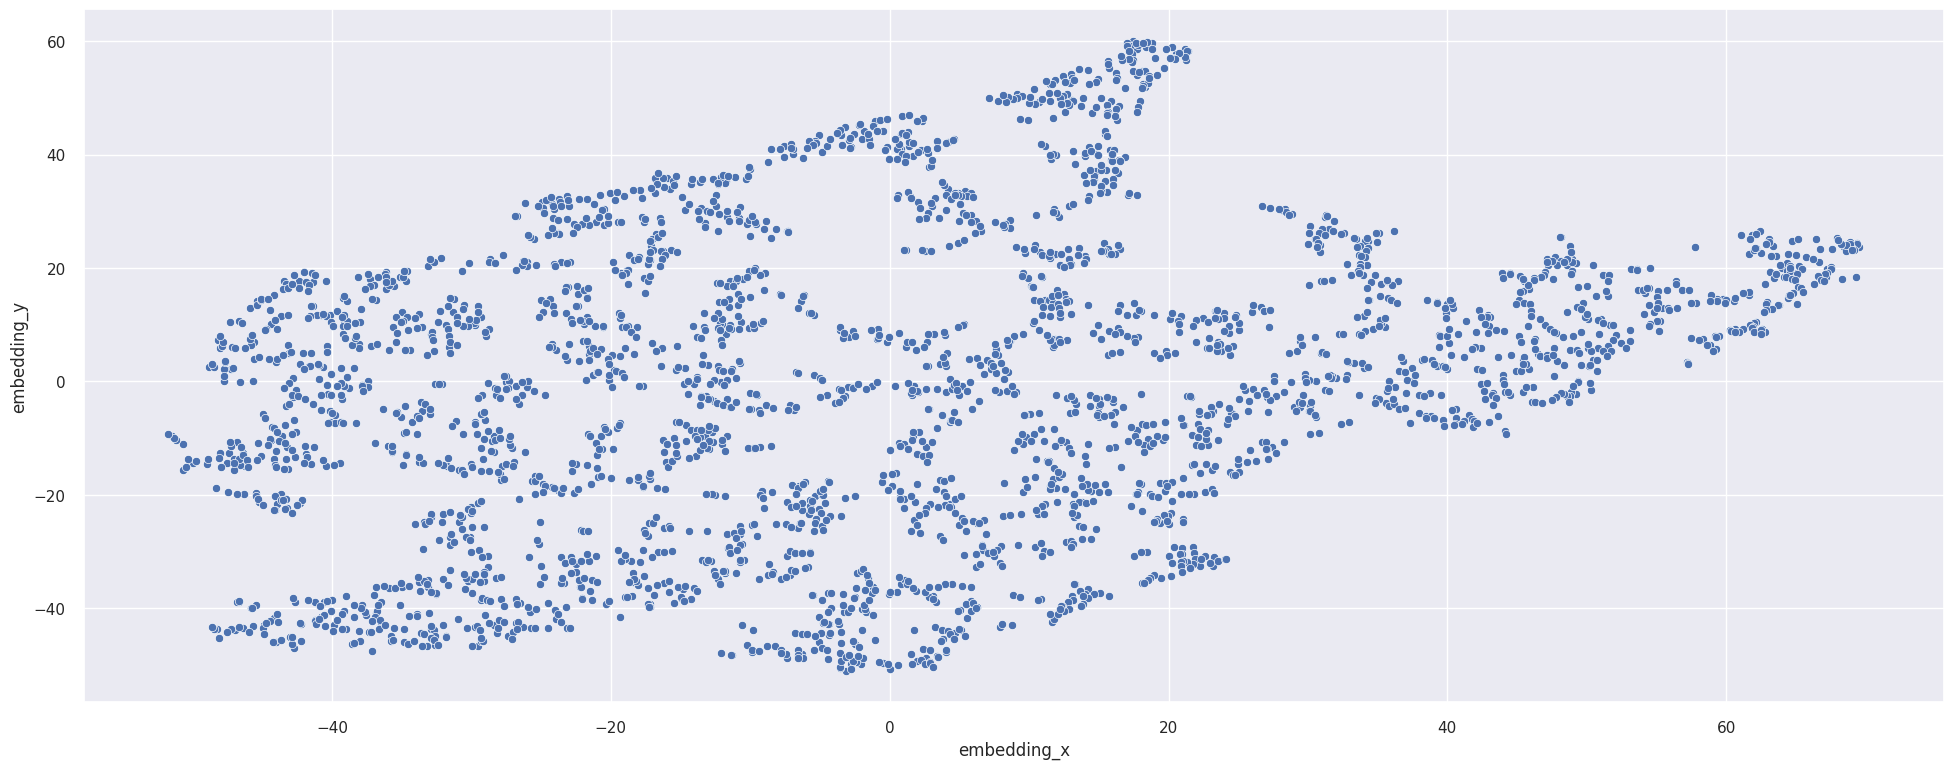

In [63]:
reducer = TSNE(n_components=2, random_state=42, n_jobs = -1)
embedding = reducer.fit_transform(X)

# Embedding
df_pca["embedding_x"] = embedding[:, 0]
df_pca["embedding_y"] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(
    x="embedding_x",
    y="embedding_y",
    data=df_pca,
);

### 4.3.4. Tree-based Embedding

In [64]:
X.head()

,gross_revenue,recency_days,qty_invoices,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qty_returns,avg_unique_basket_size,avg_basket_size
0,0.019292,0.997319,0.160976,0.008799,0.037774,0.000285,0.093151,1.000000,0.000259,0.025896,0.001234
1,0.011559,0.150134,0.039024,0.007056,0.021695,0.000298,0.071233,0.001345,0.000074,0.060260,0.003789
2,0.024000,0.005362,0.068293,0.025538,0.029479,0.000476,0.060274,0.002052,0.000617,0.048431,0.008252
3,0.003375,0.254692,0.019512,0.002225,0.003446,0.000565,0.249315,0.000734,0.000000,0.015400,0.002143
4,0.003116,0.892761,0.009756,0.000401,0.000255,0.005162,0.019178,0.003985,0.000272,0.000000,0.000634


In [69]:
# training dataset
X = df4.drop(columns = ['customer_id', 'gross_revenue'], axis = 1)
y = df4['gross_revenue']


# model definition
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)

# model training
rf_model.fit(X, y)
# Leaf

# dataframe Leaf

RandomForestRegressor(random_state=42)

In [71]:
df_leaf = pd.DataFrame(rf_model.apply(X))
print(df_leaf.shape)
df_leaf.head()

(2969, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2988,2724,3372,3249,3024,3311,3231,3135,3173,2984,3172,3099,3153,3168,2817,3086,3027,3190,3064,3288,2835,2672,2891,3290,3344,3123,3061,3229,3103,3174,2904,3389,3368,2991,3152,3268,3430,3113,3210,3079,3356,3156,3408,3136,3176,3152,3033,3336,3095,3106,3194,3206,3160,3397,2881,3191,3154,3359,3078,3323,3420,2935,3339,3240,2882,3284,3303,3277,3042,3279,3339,2946,2696,3312,3153,3168,2975,2957,3215,3171,3135,3333,3179,3096,3294,3172,3283,3246,3134,3222,3242,3222,3172,2802,3213,3099,3029,3367,3340,3324
1,2941,3110,3028,3006,3032,2976,2938,2808,3117,2951,3123,3052,3089,3145,2751,3118,2971,3065,3059,2414,3170,3101,2828,2833,2954,3115,2924,2788,3027,3139,2982,3015,2971,2972,3107,2960,2964,2836,2913,2902,2871,2794,3002,3114,3120,3019,2986,2877,2934,2942,3166,3109,3053,2952,2800,2937,2797,3021,2848,2914,2992,2909,2903,2859,2859,2901,2949,2961,2957,2959,2959,2874,2867,2897,3099,2808,2910,2899,3176,3129,3024,2922,3132,2782,2890,3097,2945,2927,3099,2835,2500,2548,2942,2750,3131,3063,2937,2901,2795,2783
2,3481,3615,3582,3465,3582,3617,3572,3546,3702,3614,3576,3558,3531,3628,3514,3541,3587,3638,3617,3480,3517,3631,3587,3520,3572,3598,3489,3593,3517,3728,3457,3683,3608,3635,3505,3625,3552,3508,3598,3481,3657,3397,3693,3631,3607,3589,3602,3632,3632,3554,3499,3496,3611,3617,3665,3507,3628,3663,3542,3416,3538,3587,3589,3680,3476,3605,3658,3648,3622,3609,3583,3610,3577,3612,3614,3569,3576,3540,3664,3599,3549,3442,3462,3556,3623,3628,3585,3695,3532,3393,3604,3456,3564,3476,3629,3561,3579,3618,3612,3667
3,2228,1964,1574,1663,1927,2215,2119,1790,2080,1746,2068,1478,1309,1328,1519,1790,1870,1592,1425,1145,1829,1238,1460,1577,2205,1995,1502,1955,1451,1515,1831,1556,1370,1583,1688,1605,2197,1784,1256,1716,1819,1872,1368,1721,1595,1498,1574,1427,1241,1234,1598,1568,1522,2186,2077,2007,1566,1914,1309,2060,1584,1505,1941,1843,1553,1516,2141,1766,1540,2083,2320,1612,1636,1544,1525,2070,1352,1553,1973,1950,2121,1395,1680,1556,2221,1862,1232,2159,1852,1546,1835,1434,2054,2061,2004,2261,1528,1431,2098,2276
4,219,732,280,596,175,711,727,219,173,165,599,157,776,727,621,178,199,737,701,568,164,704,459,319,649,197,388,541,139,762,699,867,199,300,220,756,340,197,706,597,741,512,452,605,728,168,936,669,165,623,611,443,737,565,563,574,238,210,725,586,231,246,549,191,676,439,163,733,700,605,583,189,603,834,177,197,723,585,604,184,598,892,569,212,592,217,683,854,357,809,423,172,680,585,688,737,199,902,695,583


/home/thiago/.pyenv/versions/pa005/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


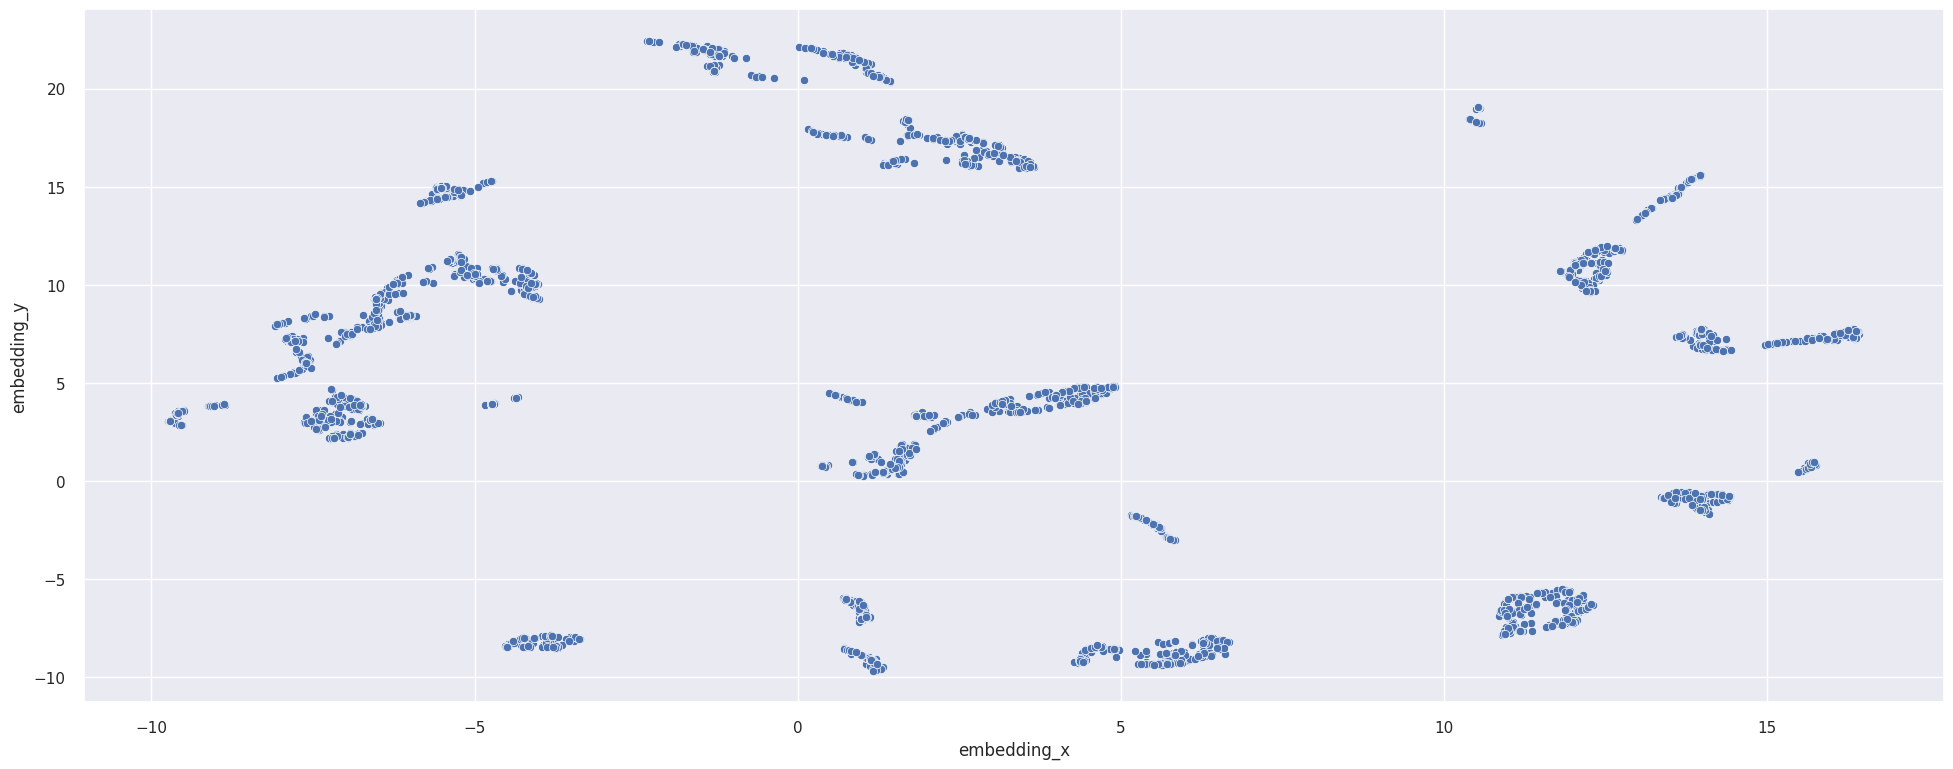

In [72]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

# Embedding
df_pca["embedding_x"] = embedding[:, 0]
df_pca["embedding_y"] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(
    x="embedding_x",
    y="embedding_y",
    data=df_pca
);

# 5.0. DATA PREPARATION

In [41]:
df5 = df4.copy()

In [42]:
print(df5.shape)
df5.head()

(2969, 12)


,customer_id,gross_revenue,recency_days,qty_invoices,qty_items,qty_products,avg_ticket,avg_recency_days,frequency,qty_returns,avg_unique_basket_size,avg_basket_size
0,17850.0,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.0,17.000000,21.0,8.735294,50.970588
1,13047.0,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.0,0.028302,6.0,19.000000,154.444444
2,12583.0,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.0,0.040323,50.0,15.466667,335.200000
3,13748.0,948.25,95.0,5.0,439.0,28.0,33.866071,92.0,0.017921,0.0,5.600000,87.800000
4,15100.0,876.00,333.0,3.0,80.0,3.0,292.000000,8.0,0.073171,22.0,1.000000,26.666667


In [42]:
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform(df5[['recency_days']])
df5['invoice_no'] = ss.fit_transform(df5[['invoice_no']])
df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])
df5['returns'] = ss.fit_transform(df5[['returns']])


# 6.0. FEATURE SELECTION

# 7.0. HYPERPARAMETER FINE-TUNING

In [44]:
X = df5.copy()

In [45]:
X.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,17850.0,0.102822,3.615052,2.265554,-0.046221,-0.434770
1,13047.0,-0.061542,-0.105681,0.132272,-0.045918,1.694803
2,12583.0,0.202887,-0.741503,0.644260,-0.041893,-0.079841
4,15100.0,-0.240980,3.155847,-0.379716,0.064029,0.275087
5,15291.0,0.044351,-0.470690,0.558928,-0.035281,0.984945


In [46]:
X = X.drop(columns=['customer_id'], axis=1)
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,0.102822,3.615052,2.265554,-0.046221,-0.434770
1,-0.061542,-0.105681,0.132272,-0.045918,1.694803
2,0.202887,-0.741503,0.644260,-0.041893,-0.079841
4,-0.240980,3.155847,-0.379716,0.064029,0.275087
5,0.044351,-0.470690,0.558928,-0.035281,0.984945


In [48]:
# Choose the number of clusters
clusters = [2,3,4,5,6,7]

## 7.1. Within-cluster sum of squares (WSS)

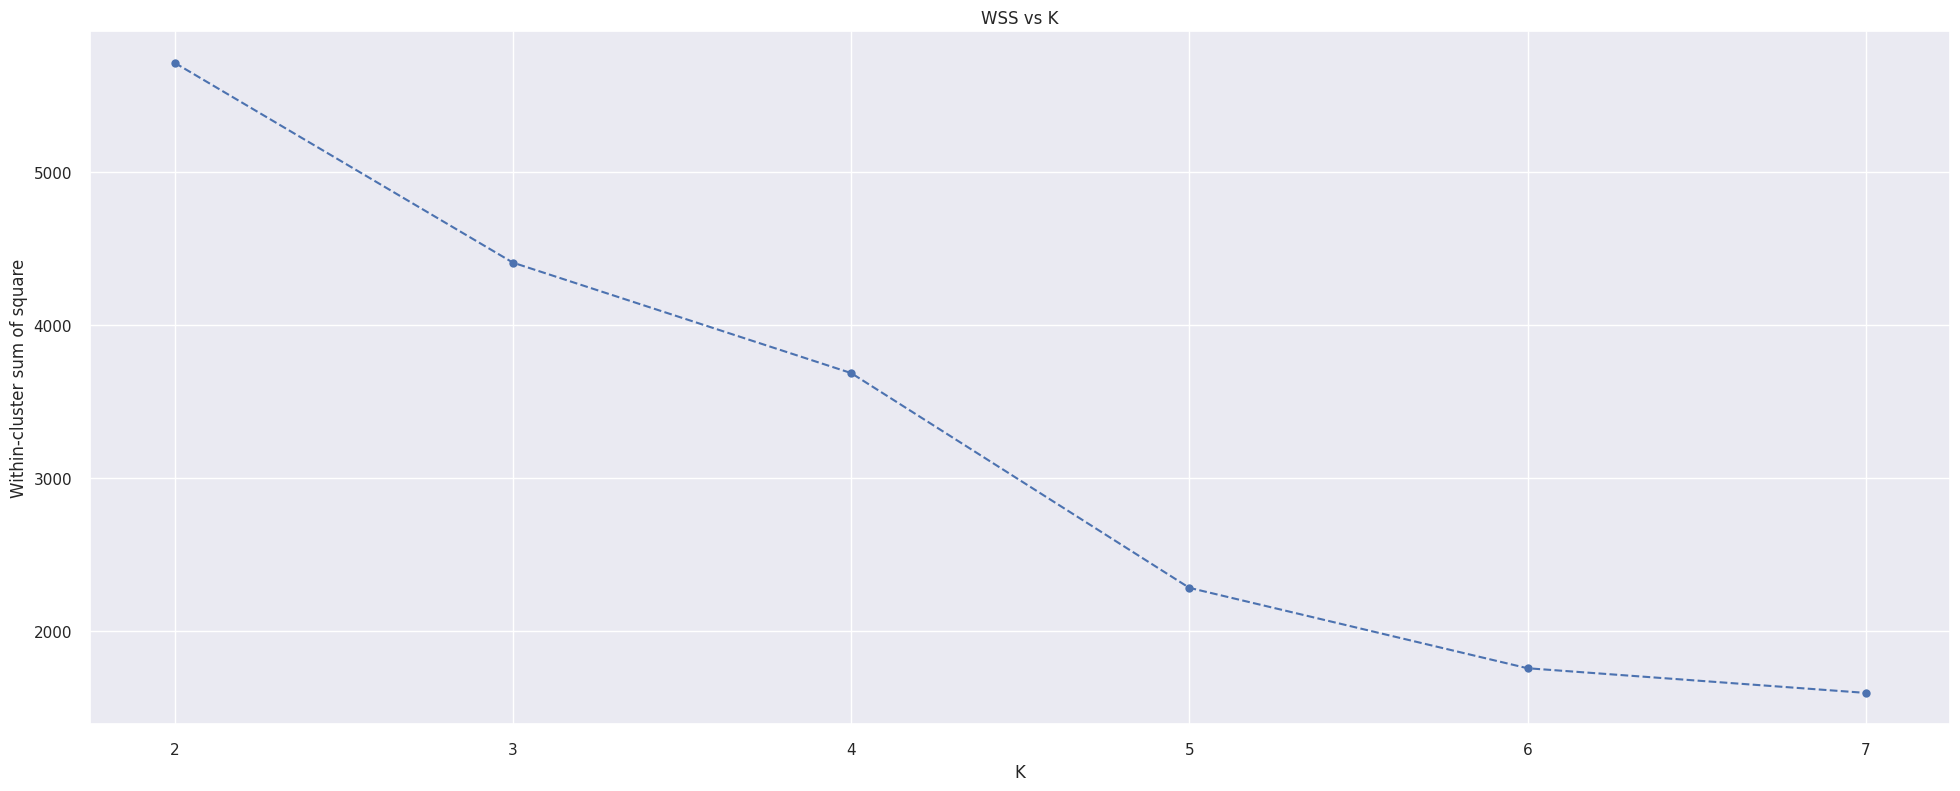

In [49]:
wss = []
for k in clusters:
    # Model definition
    kmeans = c.KMeans (init = 'random', n_clusters = k, n_init = 10, max_iter = 300)
    
    # Model training
    kmeans.fit(X)

    # validation
    wss.append(kmeans.inertia_)

#Plot WSS - Elbow method
plt.plot(clusters, wss, linestyle = '--', marker = 'o', color='b')
plt.xlabel('K');
plt.ylabel('Within-cluster sum of square');
plt.title('WSS vs K');

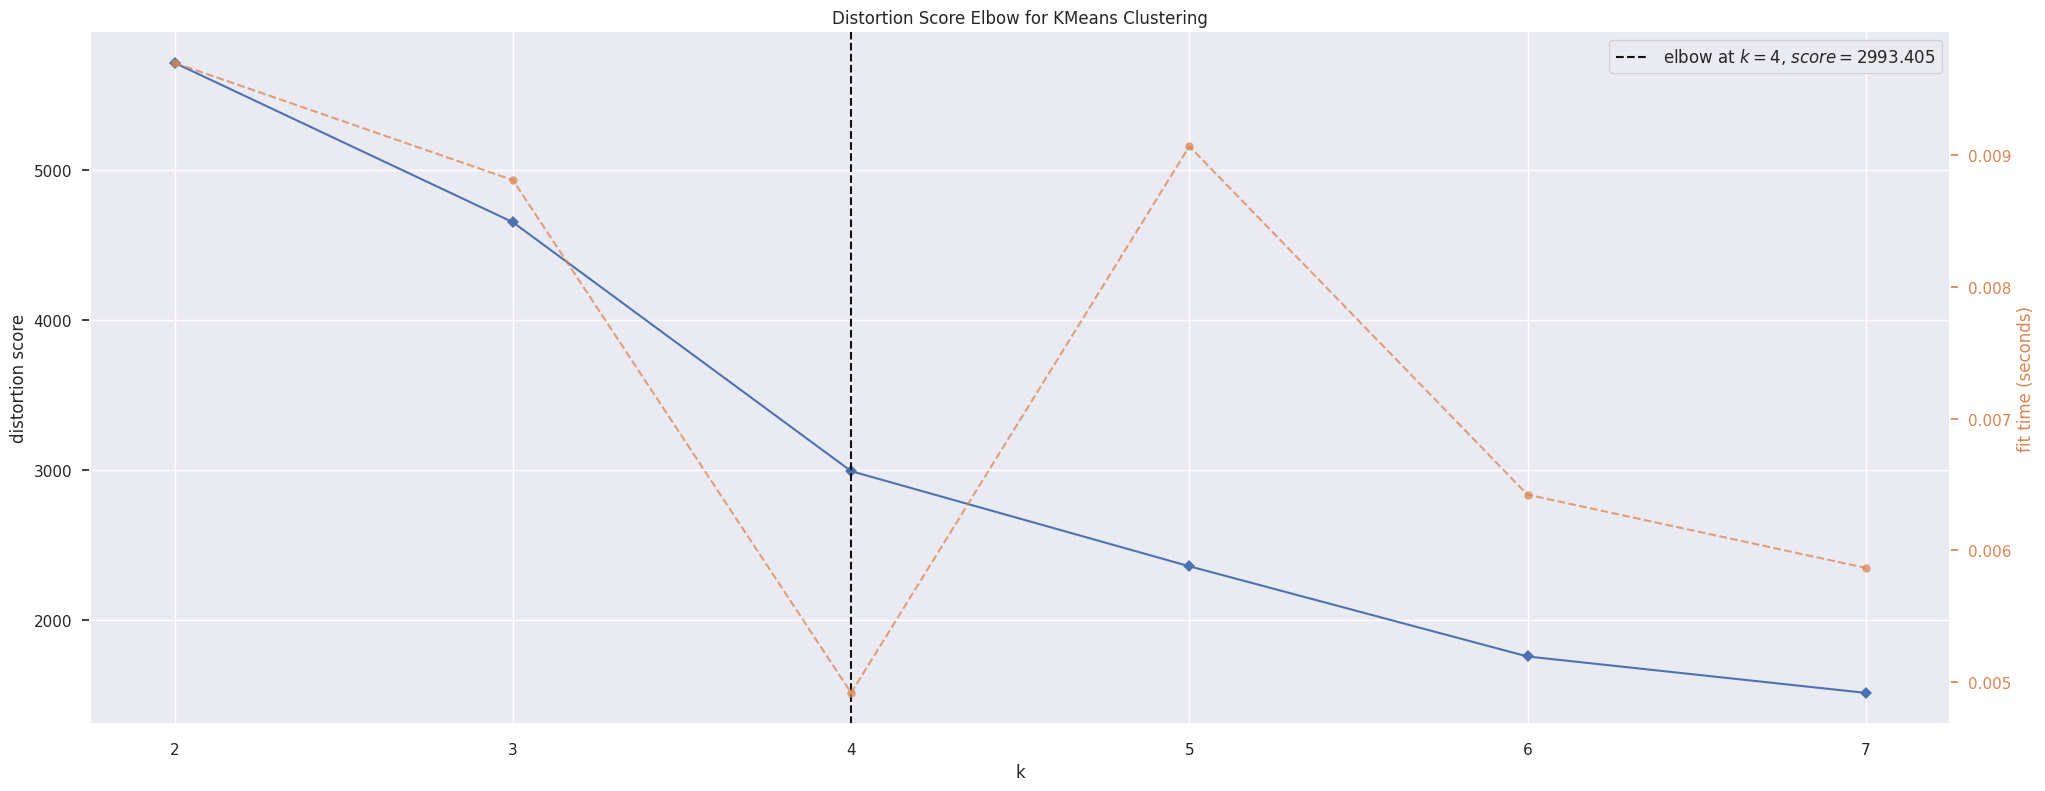

In [50]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timing=False)
kmeans.fit(X)
kmeans.show();

## 7.2. Silhouette Score (SS)

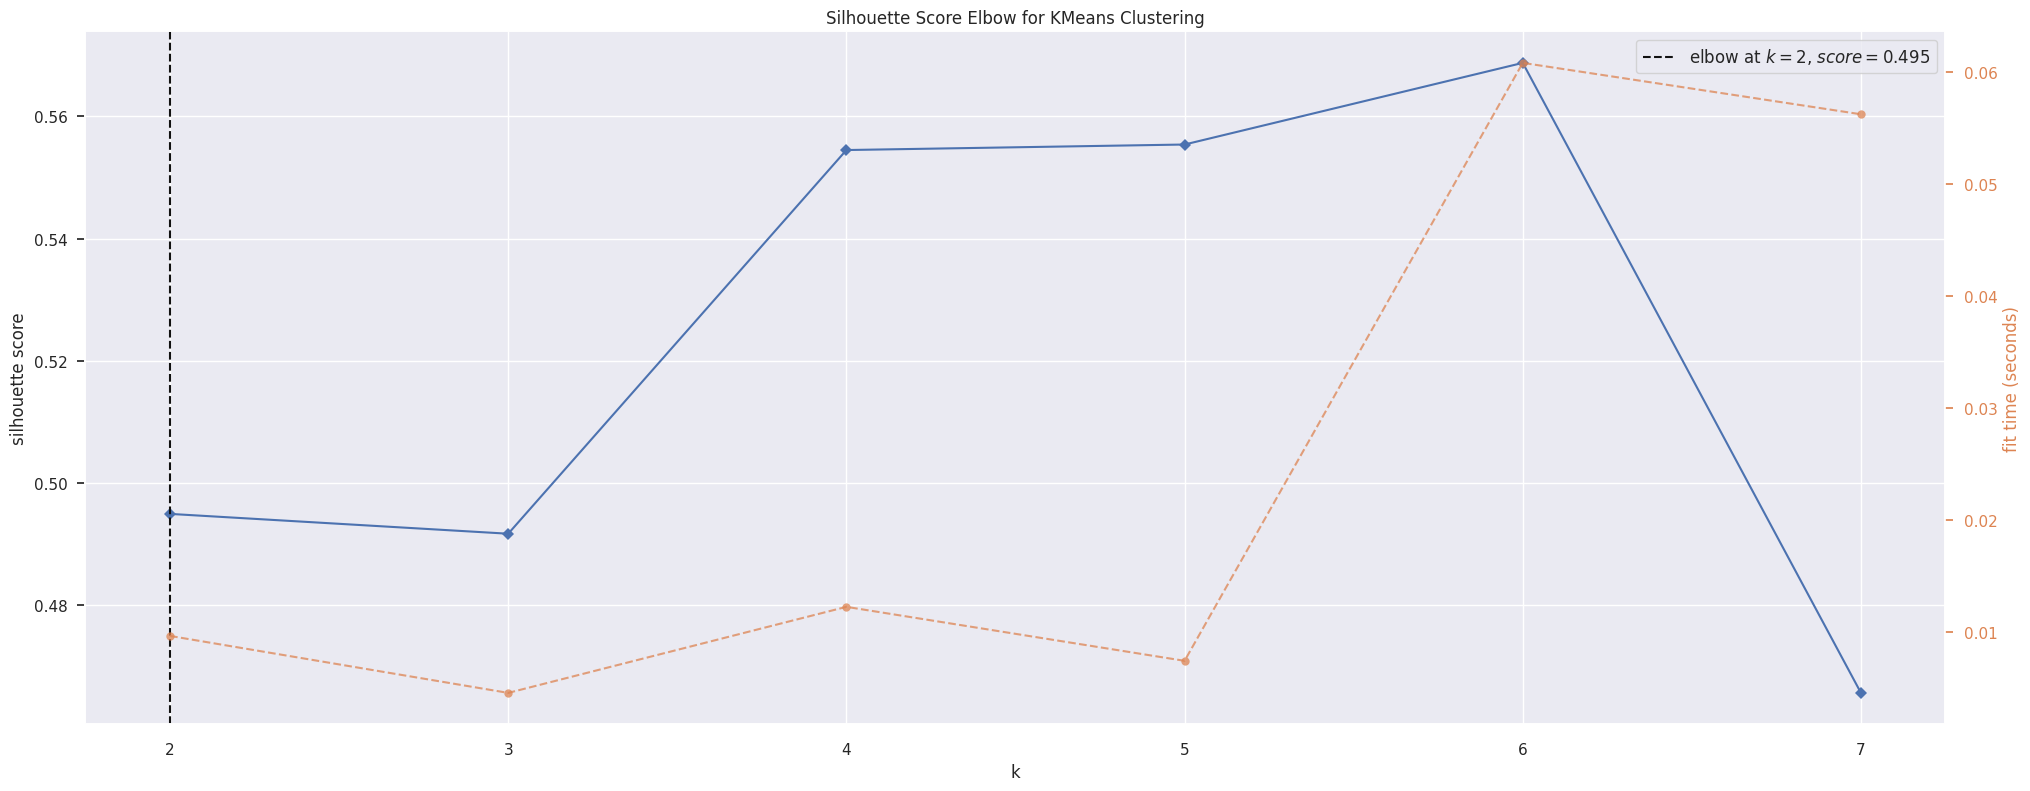

In [51]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric = 'silhouette', timing=False)
kmeans.fit(X)
kmeans.show();

## 7.3. Silhouette Analysis

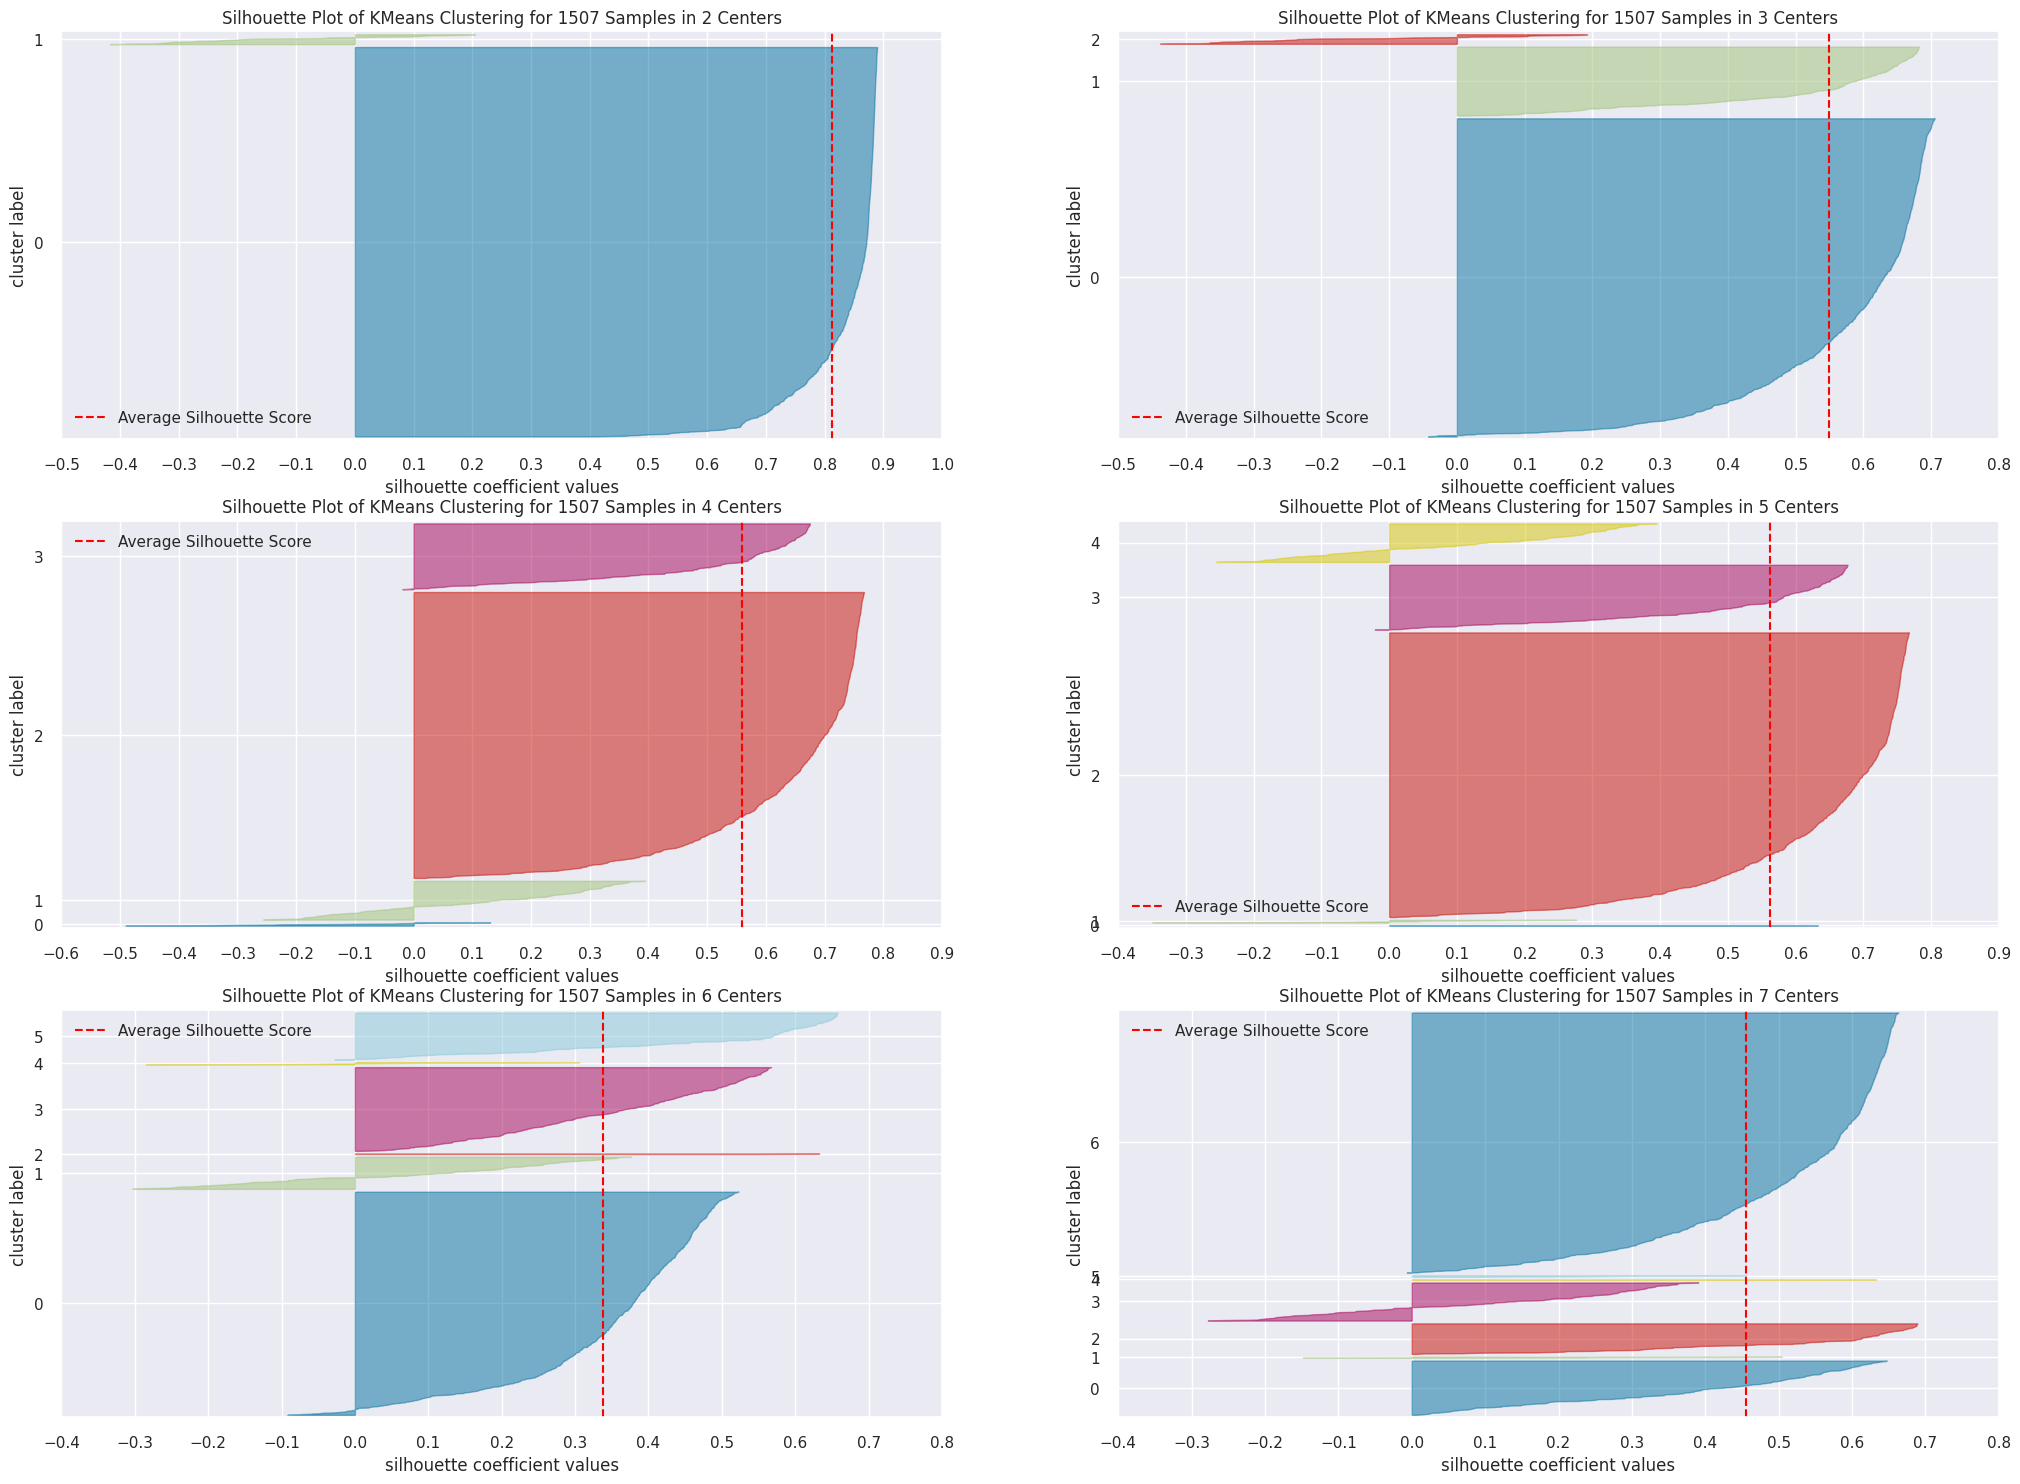

In [52]:
fig, ax = plt.subplots(3, 2, figsize=(25,18))

for k in clusters:
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()


# 8.0. MODEL TRAINING

## 8.1. K-Means

In [53]:
# Model definition
k = 4
kmeans = c.KMeans(init = 'random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# Model training
kmeans.fit(X)

# Clustering
labels = kmeans.labels_


## 8.2. Cluster Validation

In [54]:
# WSS
print(f'WSS score: {kmeans.inertia_}')
# Silhouette score
print(f'Silhouette Score:{m.silhouette_score(X, labels, metric="euclidean")}')

WSS score: 3686.7404685266492
Silhouette Score:0.5599573556819322


# 9.0. CLUSTER ANALYSIS

In [56]:
df9 = X.copy()
df9['clusters'] = labels
df9.head()

,gross_revenue,recency_days,invoice_no,avg_ticket,returns,clusters
0,0.102822,3.615052,2.265554,-0.046221,-0.434770,3
1,-0.061542,-0.105681,0.132272,-0.045918,1.694803,1
2,0.202887,-0.741503,0.644260,-0.041893,-0.079841,2
4,-0.240980,3.155847,-0.379716,0.064029,0.275087,3
5,0.044351,-0.470690,0.558928,-0.035281,0.984945,1


## 9.1. Visual inspection

### 9.1.1. Visualize Silhouette

/home/thiago/.pyenv/versions/pa005/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


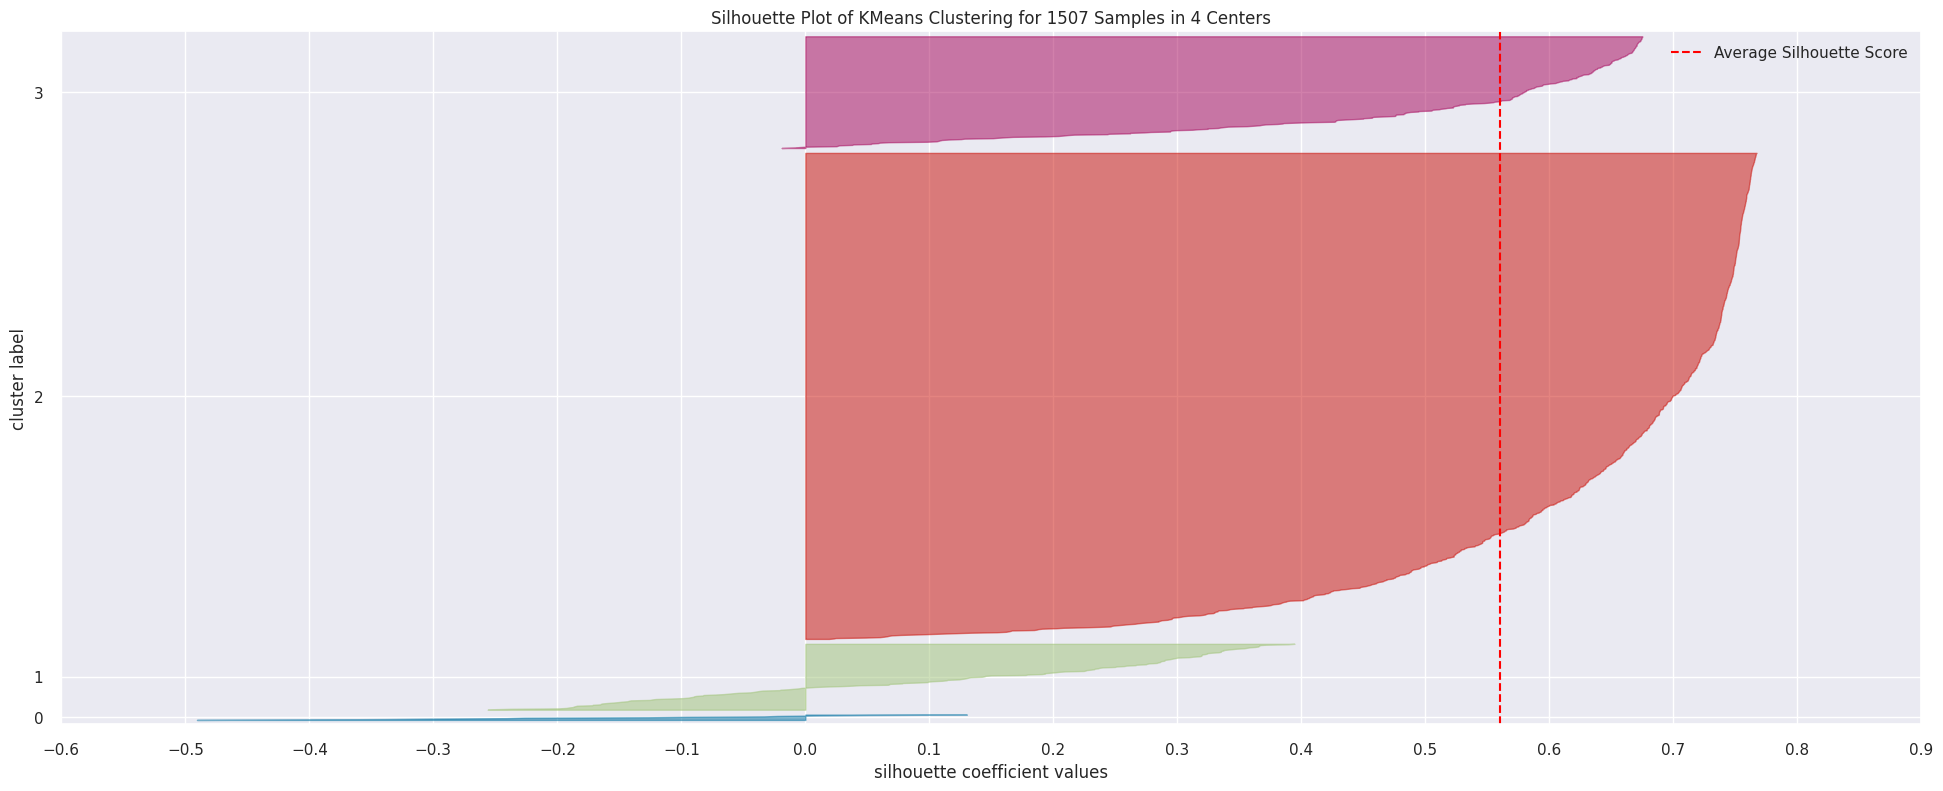

In [57]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

### 9.1.2. Visualize Clusters

In [58]:

fig = px.scatter_3d (df9, x='recency_days', y='invoice_no', z='gross_revenue', color = 'clusters')
fig.show();

### 9.1.3. Visualize Scatterplots

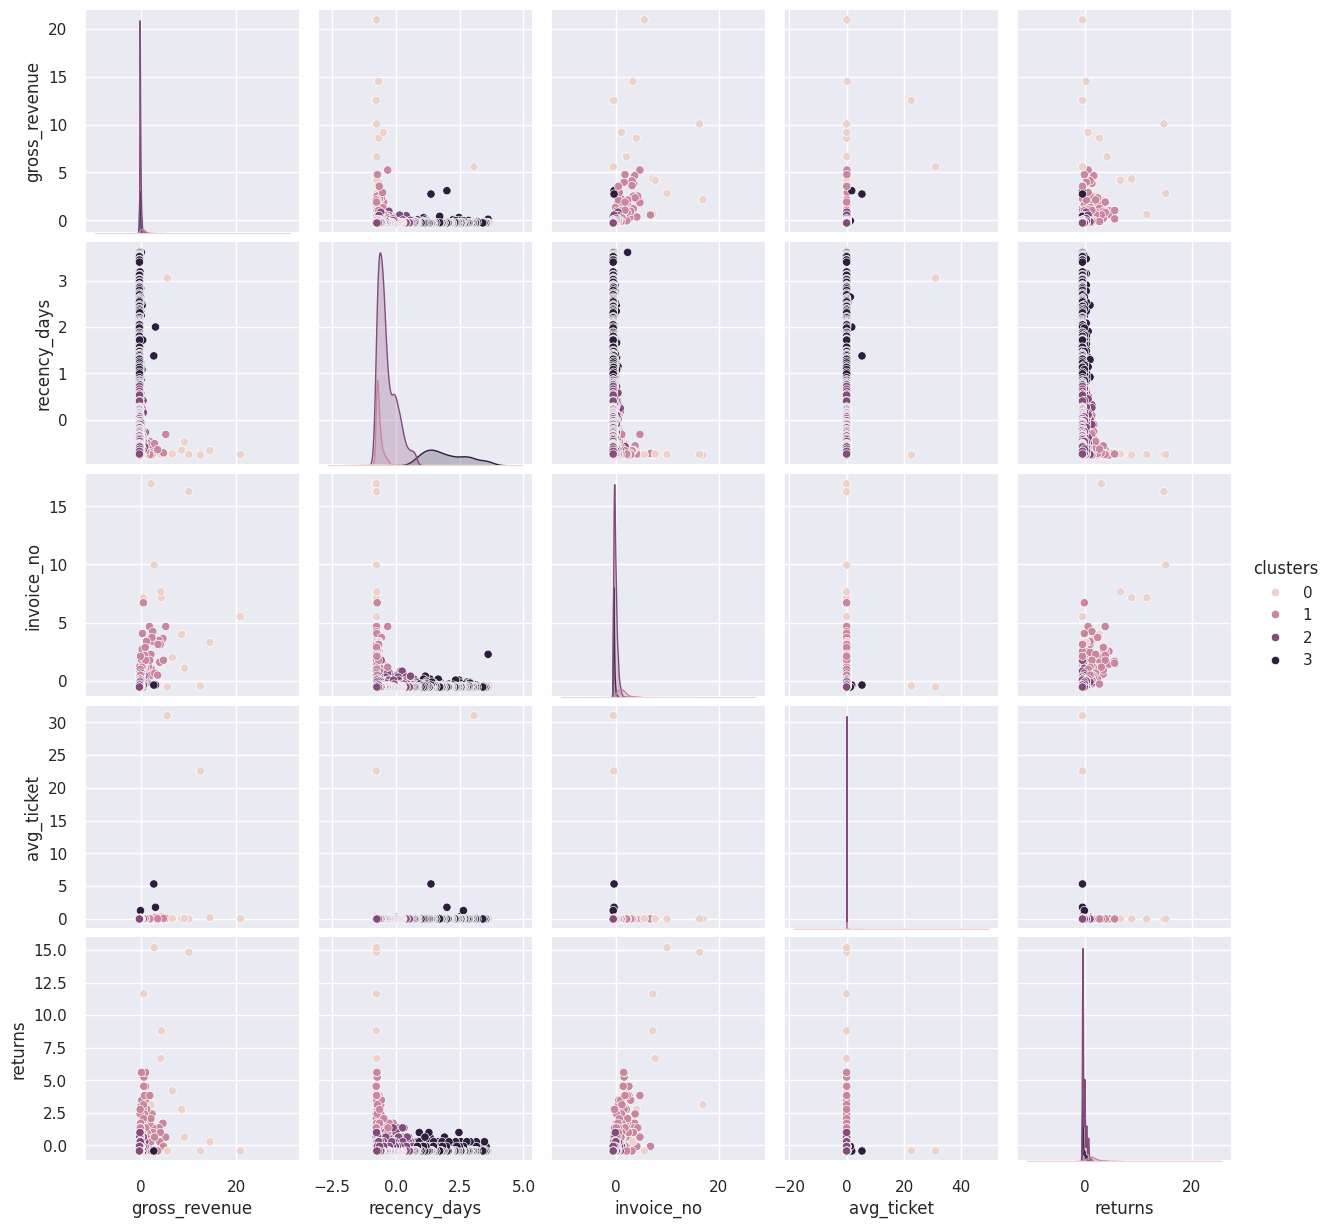

In [63]:
df_viz = df9
sns.pairplot(df_viz, hue='clusters')

### 9.1.4. UMAP t-SNE

Machine learning Manifold  
PCA - matrix, espaço de distância, espaço hilbert - 9 condições - Colorários;   
UMAP, t-SNE (2009) - Manifold - Topologia

#### 9.1.4.1. UMAP

/home/thiago/.pyenv/versions/pa005/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



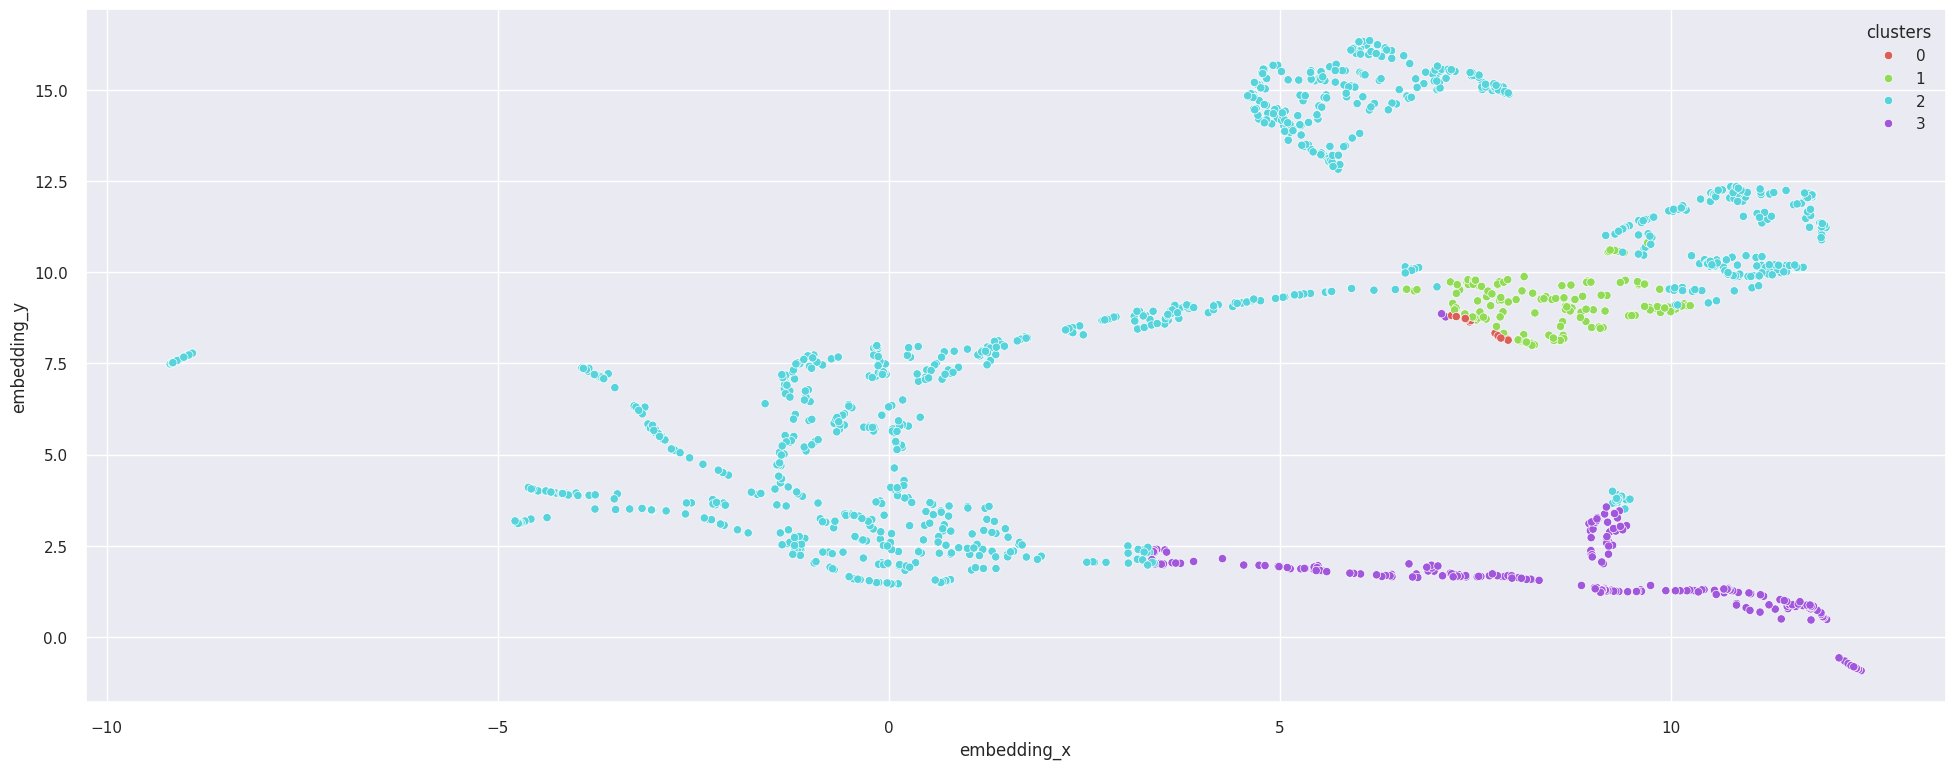

In [64]:
reducer = umap.UMAP(n_neighbors=20, random_state=42)
embedding = reducer.fit_transform(X)

# Embedding
df_viz["embedding_x"] = embedding[:, 0]
df_viz["embedding_y"] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(
    x="embedding_x",
    y="embedding_y",
    hue="clusters",
    palette=sns.color_palette("hls", n_colors=len(df_viz["clusters"].unique())),
    data=df_viz,
);

##### 9.1.4.2. t-SNE

## 9.2. Cluster Profile

In [72]:
# Number of customer
df_cluster = df9[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['perc_cust'] = np.round(100*(df_cluster['customer_id']/df_cluster['customer_id'].sum()),2)

# Avg gross revenue
df_avg_gross_rev = np.round(df9[['gross_revenue','clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_avg_gross_rev, how='left', on='clusters')

# Avg recency days
df_avg_recency = np.round(df9[['recency_days','clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_avg_recency, how='left', on='clusters')

# Avg invoice_no
df_avg_invoice_no = np.round(df9[['invoice_no','clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='left', on='clusters')

# Avg ticket
df_ticket = np.round(df9[['avg_ticket', 'clusters']].groupby('clusters').mean().reset_index(), 2)
df_cluster = pd.merge(df_cluster, df_ticket, how='left', on='clusters')

In [73]:
df_cluster

,clusters,customer_id,perc_cust,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,267,6.11,8089.03,20.28,19.53,62.78
1,1,6,0.14,182181.98,7.17,89.00,253.63
2,2,28,0.64,42614.39,6.18,57.82,162.86
3,3,4071,93.12,946.70,96.97,3.64,25.36


The resulting modeling returned 3 clusters. From these, ~ 99% of the customer base compose only one cluster whereas the remaining customers represent less than one percent of the base each.

# 10.0. DEPLOY TO PRODUCTION